In [3]:
import sklearn as skl
import sklearn.datasets
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.discriminant_analysis
import sklearn.decomposition
import sklearn.svm as svm
import sklearn.tree as tree
import sklearn.ensemble as ensemble
import sklearn.neighbors as nbr
import sklearn.linear_model as lm
import sklearn.metrics as skm
import sklearn.pipeline as pl
import sklearn.neural_network as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from Decision_region import decision_region

In [4]:
iris=skl.datasets.load_iris() 
X=iris.data[:,[2,3]]
y=iris.target 
sc=skl.preprocessing.StandardScaler() 
X=sc.fit_transform(X)
indices = np.arange(len(y))
mm= skl.model_selection.train_test_split(X,y,indices,test_size=0.2,
                                         stratify=y)
X_tr, X_t, y_tr, y_t, id_tr, id_t = mm

In [5]:
reg = nn.MLPClassifier(solver='adam',hidden_layer_sizes=(16,3), 
                       max_iter=3000, alpha=0.95, verbose=False)
reg.fit(X_tr, y_tr)

MLPClassifier(alpha=0.95, hidden_layer_sizes=(16, 3), max_iter=3000)

Decision tree train/test accuracies 0.950/0.967


/Users/ayomidealabi/MACHINE LEARNING/Tensor Flow/Decision_region.py:49: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plot.scatter(x[y==c1,0],x[y==c1,1],alpha=0.8,


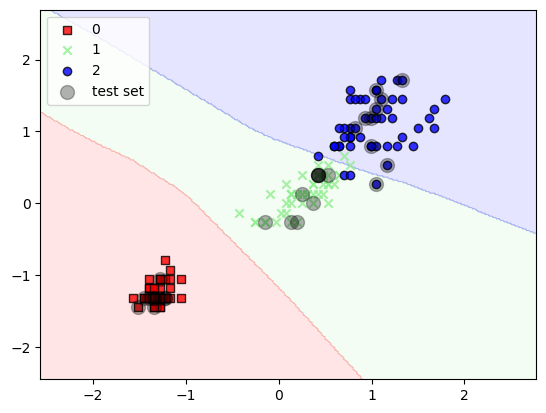

In [9]:
y_p_tr_tr = reg.predict(X_tr)
y_p_tr_t = reg.predict(X_t)
tree_train = skm.accuracy_score(y_tr, y_p_tr_tr)
tree_test = skm.accuracy_score(y_t, y_p_tr_t)
print(f'Decision tree train/test accuracies {tree_train:.3f}/{tree_test:.3f}' )
decision_region(plot,X,y,classifier=reg,test_idx=id_t)

In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds 
import numpy as np
import pathlib
import os
import matplotlib.pyplot as plot

In [11]:
iris, iris_info = tfds.load('iris', with_info=True) 
#print(iris_info)
#print(iris.keys())

2023-04-08 12:49:18.619272: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /Users/ayomidealabi/tensorflow_datasets/iris/2.0.0.incompleteIY4411/iris-train.tfrecord*...:   0%|  …

Dataset iris downloaded and prepared to /Users/ayomidealabi/tensorflow_datasets/iris/2.0.0. Subsequent calls will reuse this data.
Metal device set to: Apple M1


In [14]:
ds = iris['train']
ds = ds.shuffle(150) 
ds_train_orig = ds.take(100) 
ds_test_orig = ds.skip(100)

In [15]:
ds_train = ds_train_orig.map(lambda x: (x['features'], x['label']))
ds_test = ds_test_orig.map(lambda x: (x['features'], x['label'])) 
x_t = ds_test_orig.map(lambda x: x['features'])
y_t = ds_test_orig.map(lambda x : x['label'])

In [16]:
iris_model = tf.keras.Sequential( [tf.keras.layers.Dense(16, activation='sigmoid',
name='fc1', input_shape=(4,)), tf.keras.layers.Dense(3, name='fc2', activation='softmax')])
iris_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 16)                80        
                                                                 
 fc2 (Dense)                 (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [17]:
iris_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [18]:
num_epochs = 200
training_size = 100
batch_size = 2
steps_per_epoch = np.ceil(training_size / batch_size) 
ds_tr = ds_train.shuffle(buffer_size=training_size) 
ds_tr = ds_tr.repeat()
ds_tr = ds_tr.batch(batch_size=batch_size)
ds_tr = ds_tr.prefetch(buffer_size=1000)
history = iris_model.fit(ds_tr, epochs=num_epochs,
                         steps_per_epoch=steps_per_epoch, verbose=0)

2023-04-08 12:51:26.756551: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


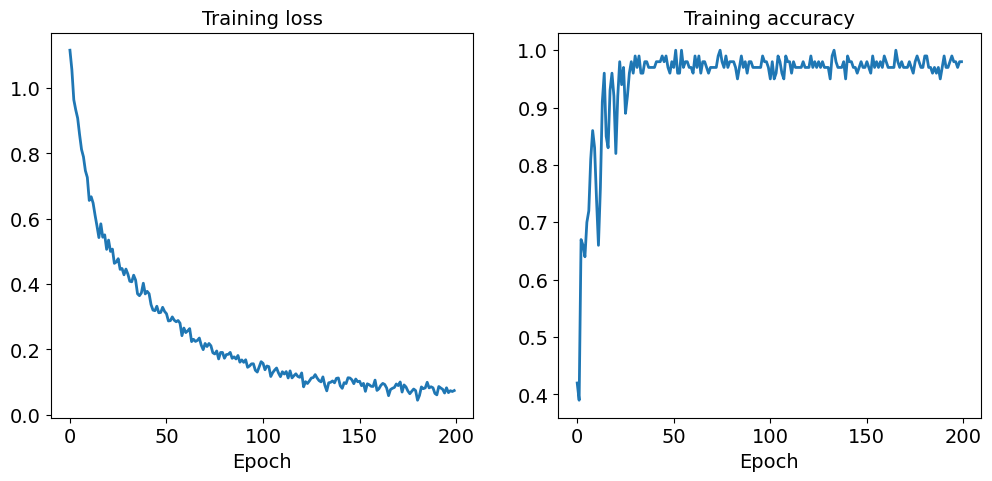

In [20]:
hist=history.history
fig = plot.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=2)
ax.set_title('Training loss', size=14) 
ax.set_xlabel('Epoch', size=14) 
ax.tick_params(axis='both', which='major', labelsize=14) 
ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=2)
ax.set_title('Training accuracy', size=14) 
ax.set_xlabel('Epoch', size=14) 
ax.tick_params(axis='both', which='major', labelsize=14) 
plot.show()

In [21]:
results = iris_model.evaluate(ds_test.batch(50), verbose=1)

1/1 [==============================] - 0s 308ms/step - loss: 0.0679 - accuracy: 1.0000


In [22]:
print(results)

[0.06792724132537842, 1.0]


In [23]:
iris_model.save('iris-classifier.h5', overwrite=True, 
                include_optimizer=True, save_format='h5')

In [24]:
iris_model_reload = tf.keras.models.load_model('iris-classifier.h5') 
results_reload = iris_model_reload.evaluate(ds_test.batch(50), verbose=1)
print(results_reload)

1/1 [==============================] - 0s 80ms/step - loss: 0.0929 - accuracy: 0.9800
[0.0928741991519928, 0.9799999594688416]


### MINST

In [25]:
import tensorflow as tf
import tensorflow_datasets as tfds 
import numpy as np
import pathlib
import os
import matplotlib.pyplot as plot

In [26]:
mnist, mnist_info = tfds.load('mnist', with_info=True, shuffle_files=False) 
print(mnist_info)
print(mnist.keys())

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /Users/ayomidealabi/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/Users/ayomidealabi/tensorflow_datasets/mnist/3.0.1.incompleteB4SPBJ',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Co

2023-04-08 12:56:12.006142: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


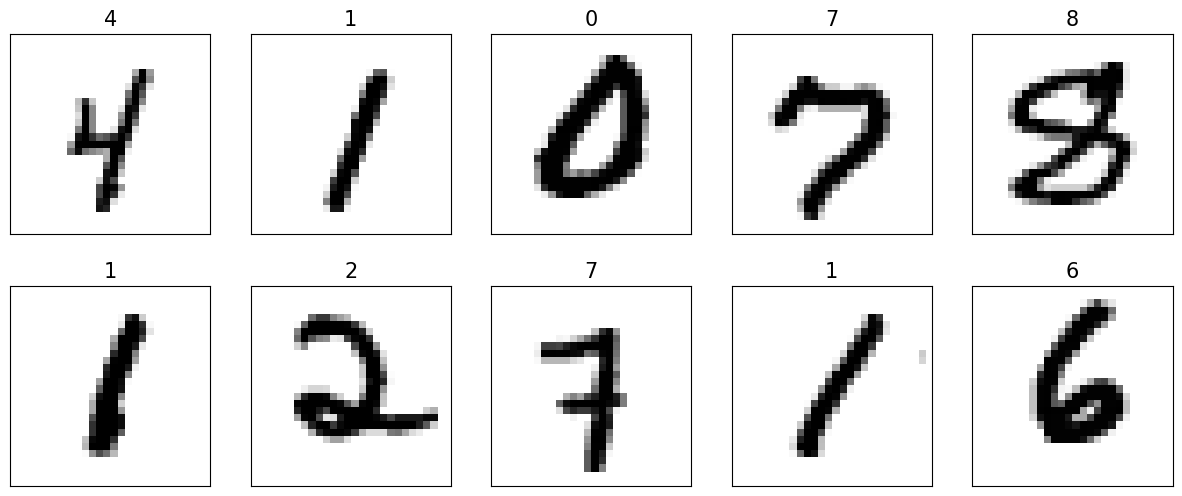

In [28]:
ds_train = mnist['train']
ds_train = ds_train.map(lambda item:(item['image'], item['label'])) 
ds_train = ds_train.batch(10)
batch = next(iter(ds_train))
fig= plot.figure(figsize=(15, 6))
for i,(image,label) in enumerate(zip(batch[0], batch[1])):
    ax = fig.add_subplot(2, 5, i+1) 
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image[:, :, 0], cmap='gray_r') 
    ax.set_title(f'{label}', size=15)
plot.show()